In [679]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
from sqlalchemy import create_engine
from matplotlib import animation


In [680]:
def get_data(nums):
    dfs=[]
    URL='http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    for i in nums:    
        URLs=URL.format(i)
        dfs.append(pd.read_csv(URLs))
    return pd.concat(dfs)
nums=[210904,210911,210918,160903,210327,210320,210320,210306,210313,210227,210220,210206,210213]
turnstiles_df=get_data(nums)


In [681]:
NYPD_Complaint_Data=pd.read_csv('/Users/hindsalem/Desktop/Number_of_crime_in_each_station.csv')


In [682]:
NYPD_Complaint_Data.columns

Index(['STATION', 'accidents'], dtype='object')

In [683]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [696]:
import datetime


In [697]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME)

In [698]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [699]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [700]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [701]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")


In [702]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [703]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE","ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-703-cf8946bd9d64>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [704]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

5800121 7550517.0
7626348 5800798.0
5802336 7626348.0
7626773 5802336.0
5803875 7626773.0
7627322 5803875.0
5805383 7627322.0
7627947 5805383.0
5806990 7627947.0
7628463 5806990.0
5808616 7628463.0
7628820 5808616.0
5330070 6685992.0
6746178 5330665.0
5331919 6746178.0
6746484 5331919.0
5333205 6746484.0
6746869 5333205.0
5334478 6746869.0
6747286 5334478.0
5335791 6747286.0
6747659 5335791.0
5337013 6747659.0
6747929 5337013.0
5326133 1567569.0
1642635 5326905.0
5328223 1642635.0
1642835 5328223.0
5329632 1642835.0
1643545 5329632.0
5331076 1643545.0
1644090 5331076.0
5332451 1644090.0
1644595 5332451.0
5333880 1644595.0
1645076 5333880.0
238 6641395.0
5033140 1951.0
65458 5033911.0
5035145 65458.0
65771 5035145.0
5036543 65771.0
66300 5036543.0
5037892 66300.0
66818 5037892.0
5039183 66818.0
67291 5039183.0
5040504 67291.0
67732 5040504.0
4676092 6132548.0
6184029 4676800.0
4678033 6184029.0
6184239 4678033.0
4679433 6184239.0
6184636 4679433.0
4680855 6184636.0
6185075 4680855.0
468

2872633 17324.0
74253 2873744.0
2875720 74253.0
74588 2875720.0
2877792 74588.0
74992 2877792.0
2879894 74992.0
75369 2879894.0
2881904 75369.0
75767 2881904.0
2883583 75767.0
76081 2883583.0
5207571 6914267.0
6958330 5208273.0
5208907 6958330.0
6958555 5208907.0
5211093 6958555.0
6958820 5211093.0
5212568 6958820.0
6959088 5212568.0
5213998 6959088.0
6959412 5213998.0
5215248 6959412.0
6959671 5215248.0
3250338 4277877.0
4303679 3250836.0
3251550 4303679.0
4303858 3251550.0
3255537 4303858.0
4304014 3255537.0
3258386 4304014.0
4304172 3258386.0
3260912 4304172.0
4304333 3260912.0
3263187 4304333.0
4304471 3263187.0
2613453 197419.0
250265 2614237.0
2614710 250265.0
250561 2614710.0
2614710 250561.0
250953 2614710.0
2614710 250953.0
251342 2614710.0
2614710 251342.0
251764 2614710.0
2614710 251764.0
252062 2614710.0
294621 2597615.0
2642079 295178.0
296619 2642079.0
2642249 296619.0
298048 2642249.0
2642547 298048.0
299693 2642547.0
2642923 299693.0
301329 2642923.0
2643326 301329.0
30

53913 1304739.0
1333945 55038.0
55712 1333945.0
1334154 55712.0
56394 1334154.0
1334369 56394.0
56983 1334369.0
1334572 56983.0
57605 1334572.0
1334781 57605.0
58368 1334781.0
1334962 58368.0
72908 1448085.0
1490416 74354.0
75170 1490416.0
1490667 75170.0
75955 1490667.0
1490987 75955.0
76720 1490987.0
1491303 76720.0
77499 1491303.0
1491554 77499.0
78319 1491554.0
1491792 78319.0
3703583 1699.0
7218 3703772.0
3704080 7218.0
7269 3704080.0
3704359 7269.0
7311 3704359.0
3704659 7311.0
7345 3704659.0
3704961 7345.0
7366 3704961.0
3705250 7366.0
7393 3705250.0
1239028 213199.0
219448 1239436.0
1239820 219448.0
219492 1239820.0
1240161 219492.0
219539 1240161.0
1240506 219539.0
219567 1240506.0
1240838 219567.0
219583 1240838.0
1241270 219583.0
219679 1241270.0
6308190 9589.0
19246 6308576.0
6308996 19246.0
19327 6308996.0
6309406 19327.0
19394 6309406.0
6309872 19394.0
19470 6309872.0
6310228 19470.0
19518 6310228.0
6310669 19518.0
19577 6310669.0
2794533 323369.0
331887 2795063.0
2795858

5734152 7262458.0
7329125 5734739.0
5735810 7329125.0
7329353 5735810.0
5736928 7329353.0
7329865 5736928.0
5738202 7329865.0
7330388 5738202.0
5739392 7330388.0
7330857 5739392.0
5740683 7330857.0
7331292 5740683.0
6021098 7283565.0
7345452 6021589.0
6022659 7345452.0
7345689 6022659.0
6023810 7345689.0
7346142 6023810.0
6024955 7346142.0
7346623 6024955.0
6026095 7346623.0
7347088 6026095.0
6027183 7347088.0
7347487 6027183.0
7111269 8660037.0
8736402 7111922.0
7113156 8736402.0
8736694 7113156.0
7114454 8736694.0
8737300 7114454.0
7115768 8737300.0
8737909 7115768.0
7117159 8737909.0
8738525 7117159.0
7118466 8738525.0
8739004 7118466.0
1372668 215831.0
270959 1373228.0
1374090 270959.0
271226 1374090.0
1375064 271226.0
271558 1375064.0
1375967 271558.0
271955 1375967.0
1376838 271955.0
272336 1376838.0
1377741 272336.0
272664 1377741.0
8115905 9254152.0
9306804 8116570.0
8117424 9306804.0
9307013 8117424.0
8118266 9307013.0
9307379 8118266.0
8119118 9307379.0
9307751 8119118.0
8119

67136073 68841002.0
68897443 67136793.0
67138112 68897443.0
68897779 67138112.0
67139310 68897779.0
68898238 67139310.0
67140596 68898238.0
68898687 67140596.0
67141206 68898687.0
68899159 67141206.0
67141207 68899159.0
68899528 67141207.0
5402180 1999598615.0
1999494994 5403092.0
5404589 1999494994.0
1999494589 5404589.0
5406153 1999494589.0
1999493941 5406153.0
5407752 1999493941.0
1999493207 5407752.0
5409200 1999493207.0
1999492584 5409200.0
5410857 1999492584.0
1999491976 5410857.0
5137883 1410411514.0
1410467752 5138593.0
5139750 1410467752.0
1410468020 5139750.0
5140935 1410468020.0
1410468389 5140935.0
5142091 1410468389.0
1410468811 5142091.0
5143158 1410468811.0
1410469178 5143158.0
5144362 1410469178.0
1410469560 5144362.0
10192120 11232565.0
11269284 10192550.0
10193369 11269284.0
11269434 10193369.0
10194172 11269434.0
11269656 10194172.0
10194983 11269656.0
11269911 10194983.0
10195786 11269911.0
11270159 10195786.0
10196577 11270159.0
11270399 10196577.0
3575408 1807116.

4591078 30876.0
280821 4591268.0
4592004 280821.0
280981 4592004.0
4592758 280981.0
281339 4592758.0
4593483 281339.0
281707 4593483.0
4594285 281707.0
282049 4594285.0
4595088 282049.0
282443 4595088.0
6261967 353619.0
414130 6261975.0
6261989 414130.0
414390 6261989.0
6262009 414390.0
414849 6262009.0
6262023 414849.0
415290 6262023.0
6262042 415290.0
415700 6262042.0
6262063 415700.0
416075 6262063.0
6312207 36219.0
107755 6313982.0
6316502 107755.0
108321 6316502.0
6319129 108321.0
109150 6319129.0
6321608 109150.0
110069 6321608.0
6324248 110069.0
110896 6324248.0
6326795 110896.0
111692 6326795.0
5181618 1719416.0
1783271 5183967.0
5186818 1783271.0
1783599 5186818.0
5189716 1783599.0
1784092 5189716.0
5192659 1784092.0
1784669 5192659.0
5195344 1784669.0
1785125 5195344.0
5198155 1785125.0
1785542 5198155.0
4646794 764015.0
815413 4649261.0
4652409 815413.0
815620 4652409.0
4655442 815620.0
815969 4655442.0
4658590 815969.0
816304 4658590.0
4661579 816304.0
816647 4661579.0
4664

8250777 5822184.0
5824188 8250777.0
8251409 5824188.0
5826270 8251409.0
8252157 5826270.0
5828139 8252157.0
8252899 5828139.0
5830188 8252899.0
8253491 5830188.0
5365003 6759558.0
6807326 5366012.0
5367030 6807326.0
6807649 5367030.0
5368171 6807649.0
6807964 5368171.0
5369310 6807964.0
6808290 5369310.0
5370511 6808290.0
6808583 5370511.0
5371710 6808583.0
6808892 5371710.0
3536704 5073319.0
5136666 3537573.0
3538575 5136666.0
5137065 3538575.0
3539670 5137065.0
5137463 3539670.0
3540869 5137463.0
5137921 3540869.0
3542012 5137921.0
5138358 3542012.0
3543269 5138358.0
5138756 3543269.0
11450095 15543444.0
15614207 11451910.0
11455137 15614207.0
15614606 11455137.0
11458724 15614606.0
15615082 11458724.0
11462054 15615082.0
15615580 11462054.0
11465561 15615580.0
15616090 11465561.0
11469088 15616090.0
15616423 11469088.0
56095346 61258124.0
61374148 56098102.0
56102369 61374148.0
61374788 56102369.0
56106790 61374788.0
61375550 56106790.0
56111361 61375550.0
61376408 56111361.0
561160

507910 33964251.0
34020376 508197.0
509164 34020376.0
34020541 509164.0
510223 34020541.0
34020955 510223.0
511356 34020955.0
34021422 511356.0
512433 34021422.0
34021875 512433.0
513406 34021875.0
34022214 513406.0
5062737 6548359.0
6567553 5063345.0
5065035 6567553.0
6567615 5065035.0
5066746 6567615.0
6567730 5066746.0
5068517 6567730.0
6567887 5068517.0
5070220 6567887.0
6567993 5070220.0
5071902 6567993.0
6568092 5071902.0
6280483 8783870.0
8858726 6281798.0
6283652 8858726.0
8858726 6283652.0
6285482 8858726.0
8859311 6285482.0
6287564 8859311.0
8859928 6287564.0
6289515 8859928.0
8860486 6289515.0
6291631 8860486.0
8861049 6291631.0
7519490 9686900.0
9742649 7520488.0
7521867 9742649.0
9742649 7521867.0
7523375 9742649.0
9743082 7523375.0
7525057 9743082.0
9743515 7525057.0
7526579 9743515.0
9743956 7526579.0
7528216 9743956.0
9744355 7528216.0
7947991 10473452.0
10547249 7949025.0
7950704 10547249.0
10547249 7950704.0
7952400 10547249.0
10547774 7952400.0
7954331 10547774.0
105

3361423 5588274.0
5685489 3362301.0
3364049 5685489.0
5685494 3364049.0
3365770 5685494.0
5686112 3365770.0
3367577 5686112.0
5686814 3367577.0
3369342 5686814.0
5687418 3369342.0
3371041 5687418.0
5688050 3371041.0
1000558 57.0
166 1000558.0
1000559 166.0
4783596 457908.0
593614 4784631.0
4786466 593614.0
593623 4786466.0
4788264 593623.0
594519 4788264.0
4790217 594519.0
595528 4790217.0
4792053 595528.0
596474 4792053.0
4793923 596474.0
597263 4793923.0
8611391 10485642.0
10552497 8612104.0
8613390 10552497.0
10552497 8613390.0
8614732 10552497.0
10552919 8614732.0
8616082 10552919.0
10553409 8616082.0
8617364 10553409.0
10553820 8617364.0
8618692 10553820.0
10554227 8618692.0
5495253 8104765.0
8242558 5496408.0
5498323 8242558.0
8242558 5498323.0
5500244 8242558.0
8243409 5500244.0
5502144 8243409.0
8244371 5502144.0
5504074 8244371.0
8245296 5504074.0
5506017 8245296.0
8246084 5506017.0
8723236 12177397.0
12346157 8724865.0
8727454 12346157.0
12346157 8727454.0
8730140 12346157.0


1562106 18249.0
18648 1562106.0
1562763 18648.0
18994 1562763.0
1563378 18994.0
19360 1563378.0
3667829 69791.0
121125 3668763.0
3669657 121125.0
121349 3669657.0
3670666 121349.0
121711 3670666.0
3671650 121711.0
122086 3671650.0
3672579 122086.0
122420 3672579.0
3673550 122420.0
122745 3673550.0
106 67960951.0
5406541 3853.0
66493 5407695.0
5409026 66493.0
66774 5409026.0
5410448 66774.0
67248 5410448.0
5411945 67248.0
67737 5411945.0
5413354 67737.0
68201 5413354.0
5414739 68201.0
68589 5414739.0
12361618 14262607.0
14342100 12362865.0
12364608 14342100.0
14342430 12364608.0
12366502 14342430.0
14342463 12366502.0
12368335 14342463.0
14342471 12368335.0
12370174 14342471.0
14342476 12370174.0
12372027 14342476.0
14342476 12372027.0
4026598 3009557.0
3010551 4026598.0
4026779 3010551.0
3011615 4026779.0
4027545 3011615.0
3012682 4027545.0
4028321 3012682.0
3013710 4028321.0
4029127 3013710.0
3014835 4029127.0
4029828 3014835.0
4721607 292956.0
322853 4722488.0
4723500 322853.0
322987

7640705 10231876.0
10232273 7640705.0
7642803 10232273.0
10232667 7642803.0
8235406 10312657.0
10361091 8237148.0
8238679 10361091.0
10361437 8238679.0
8240281 10361437.0
10361757 8240281.0
8241878 10361757.0
10362039 8241878.0
8243464 10362039.0
10362341 8243464.0
8245342 10362341.0
10362678 8245342.0
14592043 17163859.0
17242516 14594251.0
14596504 17242516.0
17242973 14596504.0
14598665 17242973.0
17243550 14598665.0
14600670 17243550.0
17244021 14600670.0
14602682 17244021.0
17244532 14602682.0
14604955 17244532.0
17245034 14604955.0
18458818 69585306.0
69664830 18460111.0
18462018 69664830.0
69665216 18462018.0
18464009 69665216.0
69665751 18464009.0
18466107 69665751.0
69666393 18466107.0
18468144 69666393.0
69667027 18468144.0
18470087 69667027.0
69667497 18470087.0
67472018 21273516.0
21370450 67472865.0
67474242 21370450.0
21371010 67474242.0
67475860 21371010.0
21371632 67475860.0
67477468 21371632.0
21372352 67477468.0
67478970 21372352.0
21373138 67478970.0
67480366 2137313

161171 8257672.0
8258741 161171.0
161293 8258741.0
8260079 161293.0
161469 8260079.0
8261447 161469.0
161648 8261447.0
8262764 161648.0
161802 8262764.0
8263940 161802.0
161974 8263940.0
11135399 112188.0
130704 11136426.0
11138234 130704.0
130798 11138234.0
11140192 130798.0
130919 11140192.0
11142154 130919.0
131039 11142154.0
11144059 131039.0
131160 11144059.0
11145811 131160.0
131273 11145811.0
3550206 59371.0
67811 3552386.0
3556070 67811.0
67856 3556070.0
3560063 67856.0
67902 3560063.0
3564209 67902.0
67987 3564209.0
3568140 67987.0
68049 3568140.0
3571852 68049.0
68134 3571852.0
30093 1253634.0
1255545 30093.0
30782 1255545.0
1257460 30782.0
31638 1257460.0
1259522 31638.0
32494 1259522.0
1261509 32494.0
33274 1261509.0
1263428 33274.0
33925 1263428.0
15383007 17852849.0
17933564 15384033.0
15385702 17933564.0
17934038 15385702.0
15387524 17934038.0
17934634 15387524.0
15389512 17934634.0
17935276 15389512.0
15391300 17935276.0
17935861 15391300.0
15393079 17935861.0
17936369 

109751 9004715.0
9006427 109751.0
110461 9006427.0
9008262 110461.0
110886 9008262.0
6822950 25855.0
121026 6825174.0
6827317 121026.0
122110 6827317.0
6829257 122110.0
123392 6829257.0
6831207 123392.0
124325 6831207.0
6832958 124325.0
125314 6832958.0
6834752 125314.0
126048 6834752.0
7471568 1915810068.0
1915914437 7473650.0
7476005 1915914437.0
1915914616 7476005.0
7478278 1915914616.0
1915914658 7478278.0
7480561 1915914658.0
1915915211 7480561.0
7482685 1915915211.0
1915915449 7482685.0
7484815 1915915449.0
1915915570 7484815.0
2431824 1286134.0
1322103 2432369.0
2433380 1322103.0
1322139 2433380.0
2434442 1322139.0
1322332 2434442.0
2435477 1322332.0
1322620 2435477.0
2436437 1322620.0
1322904 2436437.0
2437310 1322904.0
1323113 2437310.0
4529734 6129890.0
6179823 4530152.0
4531235 6179823.0
6180079 4531235.0
4532332 6180079.0
6180487 4532332.0
4533438 6180487.0
6180951 4533438.0
4534557 6180951.0
6181328 4534557.0
4535558 6181328.0
6181600 4535558.0
3157493 582052.0
628767 3158

68030 8546259.0
8546669 68030.0
68163 8546669.0
8547116 68163.0
68330 8547116.0
8547546 68330.0
68482 8547546.0
8548043 68482.0
68685 8548043.0
7489223 1390599.0
1421769 7489610.0
7490094 1421769.0
1421930 7490094.0
7490592 1421930.0
1422170 7490592.0
7490989 1422170.0
1422430 7490989.0
7491228 1422430.0
1422658 7491228.0
7491736 1422658.0
1422937 7491736.0
6100547 7753572.0
7826074 6101362.0
6102628 7826074.0
7826287 6102628.0
6103835 7826287.0
7826755 6103835.0
6105016 7826755.0
7827219 6105016.0
6106329 7827219.0
7827718 6106329.0
6107640 7827718.0
7828267 6107640.0
1525099 59895.0
188052 1526482.0
1528562 188052.0
188525 1528562.0
1530803 188525.0
189367 1530803.0
1533023 189367.0
190369 1533023.0
1535108 190369.0
191295 1535108.0
1537458 191295.0
192325 1537458.0
17251752 21906660.0
22122652 17254266.0
17257567 22122652.0
22123452 17257567.0
17261096 22123452.0
22124762 17261096.0
17264704 22124762.0
22126135 17264704.0
17268196 22126135.0
22127363 17268196.0
17271564 22127363.0
2

7894383 1827808409.0
1827807390 7894383.0
7896639 1827807390.0
1827806401 7896639.0
7898908 1827806401.0
1827805386 7898908.0
7461570 9384876.0
9466072 7462641.0
7464254 9466072.0
9466388 7464254.0
7465909 9466388.0
9466949 7465909.0
7467562 9466949.0
9467539 7467562.0
7469392 9467539.0
9468107 7469392.0
7471092 9468107.0
9468772 7471092.0
1778631374 1780487935.0
1780563948 1778632251.0
1778633880 1780563948.0
1780564263 1778633880.0
1778635427 1780564263.0
1780564801 1778635427.0
1778636984 1780564801.0
1780565350 1778636984.0
1778638053 1780565350.0
1780565850 1778638053.0
1778639652 1780565850.0
1780566389 1778639652.0
7360867 10703894.0
10830415 7362088.0
7364008 10830415.0
10830953 7364008.0
7365867 10830953.0
10831810 7365867.0
7367882 10831810.0
10832800 7367882.0
7370260 10832800.0
10833704 7370260.0
7372300 10833704.0
10834707 7372300.0
2065094 955071.0
1032524 2065745.0
2066557 1032524.0
1032831 2066557.0
2067134 1032831.0
1033422 2067134.0
2068046 1033422.0
1033953 2068046.0

88772 2804498.0
1491141 374473.0
13856 1491141.0
1491141 13856.0
13873 1491141.0
1491141 13873.0
14003 1491141.0
1491141 14003.0
14170 1491141.0
1491141 14170.0
14326 1491141.0
1491141 14326.0
14395 1491141.0
3241743 1476912610.0
1476933808 3241870.0
3242520 1476933808.0
1476933828 3242520.0
3243272 1476933828.0
1476934025 3243272.0
3244027 1476934025.0
1476934234 3244027.0
3244758 1476934234.0
1476934432 3244758.0
3245389 1476934432.0
1476934527 3245389.0
6140707 7604379.0
7640612 6140934.0
6142100 7640612.0
7640667 6142100.0
6143491 7640667.0
7640915 6143491.0
6144860 7640915.0
7641208 6144860.0
6146248 7641208.0
7641468 6146248.0
6147454 7641468.0
7641622 6147454.0
6940402 483653.0
506270 6940651.0
6941371 506270.0
506372 6941371.0
6942228 506372.0
506559 6942228.0
6943064 506559.0
506771 6943064.0
6943912 506771.0
506978 6943912.0
6944719 506978.0
507103 6944719.0
10684283 41128.0
79072 10684718.0
10685823 79072.0
79269 10685823.0
10687166 79269.0
79577 10687166.0
10688530 79577.0


5521634 577146.0
578965 5521634.0
5524747 578965.0
580898 5524747.0
5528465 580898.0
582707 5528465.0
5531942 582707.0
584709 5531942.0
4218115 8370696.0
8561758 4221234.0
4224622 8561758.0
8562612 4224622.0
4228151 8562612.0
8563991 4228151.0
4231856 8563991.0
8565416 4231856.0
4235041 8565416.0
8566783 4235041.0
4238328 8566783.0
8568132 4238328.0
16777823 769491.0
769726 16777823.0
16777876 769726.0
769957 16777876.0
16777902 769957.0
770144 16777902.0
16777919 770144.0
770367 16777919.0
16777933 770367.0
770544 16777933.0
16777933 770544.0
3162494 22261.0
25468 3162494.0
3162584 25468.0
25503 3162584.0
3162663 25503.0
25528 3162663.0
3162754 25528.0
25543 3162754.0
3162840 25543.0
25564 3162840.0
3162926 25564.0
25577 3162926.0
1391465 76115.0
79047 1391624.0
1391676 79047.0
79047 1391676.0
1391742 79047.0
79062 1391742.0
1391777 79062.0
79071 1391777.0
1391815 79071.0
79081 1391815.0
1391866 79081.0
79082 1391866.0
4616027 1624583542.0
1624460779 4616027.0
4618157 1624460779.0
162

2581261 132396.0
55195 2581700.0
2582382 55195.0
55507 2582382.0
2583138 55507.0
56014 2583138.0
2583922 56014.0
56533 2583922.0
2584658 56533.0
57010 2584658.0
2585390 57010.0
57063 2585390.0
3276409 223304.0
268661 3276671.0
3277143 268661.0
268851 3277143.0
3277671 268851.0
269148 3277671.0
3278210 269148.0
269469 3278210.0
3278738 269469.0
269780 3278738.0
3279211 269780.0
269806 3279211.0
819416 1868038.0
1913134 819798.0
820598 1913134.0
1913334 820598.0
821423 1913334.0
1913649 821423.0
822241 1913649.0
1913997 822241.0
823004 1913997.0
1914328 823004.0
823767 1914328.0
1914344 823767.0
8636773 10378463.0
10454803 8637436.0
8638824 10454803.0
10455072 8638824.0
8640229 10455072.0
10455660 8640229.0
8641690 10455660.0
10456220 8641690.0
8643112 10456220.0
10456802 8643112.0
8644463 10456802.0
10456822 8644463.0
1379094 232852.0
255572 1379212.0
1379557 255572.0
255649 1379557.0
1379932 255649.0
255844 1379932.0
1380313 255844.0
256024 1380313.0
1380672 256024.0
256195 1380672.0
1

7834280 4095277.0
4098120 7834280.0
7834989 4098120.0
4100820 7834989.0
7835547 4100820.0
18334225 73091.0
155824 18335663.0
18338486 155824.0
156204 18338486.0
18341426 156204.0
156780 18341426.0
18344705 156780.0
157485 18344705.0
18347789 157485.0
158207 18347789.0
18350657 158207.0
158760 18350657.0
8786576 11444887.0
11494348 8787173.0
8789082 11494348.0
11494523 8789082.0
8791187 11494523.0
11494925 8791187.0
8793505 11494925.0
11495322 8793505.0
8795651 11495322.0
11495759 8795651.0
8797447 11495759.0
11496092 8797447.0
4185377 7911651.0
8005572 4186668.0
4189614 8005572.0
8005945 4189614.0
4192833 8005945.0
8006616 4192833.0
4196284 8006616.0
8007385 4196284.0
4199499 8007385.0
8008186 4199499.0
4202447 8008186.0
8008852 4202447.0
3708303 6935820.0
7003716 3709407.0
3711966 7003716.0
7003969 3711966.0
3714771 7003969.0
7004468 3714771.0
3717728 7004468.0
7005009 3717728.0
3720599 7005009.0
7005652 3720599.0
3723164 7005652.0
7006103 3723164.0
3584540 6591804.0
6654267 3585473.0

675695199 672999554.0
673001865 675695199.0
675695730 673001865.0
673004507 675695730.0
675696455 673004507.0
673007217 675696455.0
675697223 673007217.0
673009830 675697223.0
675697933 673009830.0
673012196 675697933.0
675698453 673012196.0
1826871995 1824403037.0
1824320953 1826871053.0
1826868840 1824320953.0
1824320476 1826868840.0
1826866284 1824320476.0
1824319839 1826866284.0
1826863672 1824319839.0
1824319071 1826863672.0
1826861098 1824319071.0
1824318417 1826861098.0
1826858766 1824318417.0
1824317947 1826858766.0
337358935 339790074.0
339864171 337359898.0
337361922 339864171.0
339864550 337361922.0
337364325 339864550.0
339865104 337364325.0
337366748 339865104.0
339865696 337366748.0
337369247 339865696.0
339866277 337369247.0
337371475 339866277.0
339866735 337371475.0
7822734 1014826.0
1102856 7823910.0
7826236 1102856.0
1103383 7826236.0
7828976 1103383.0
1104007 7828976.0
7831703 1104007.0
1104738 7831703.0
7834468 1104738.0
1105382 7834468.0
7837007 1105382.0
1105871 

6322991 7906303.0
7971046 6323704.0
6324893 7971046.0
7971329 6324893.0
6326075 7971329.0
7971807 6326075.0
6327284 7971807.0
7972283 6327284.0
6328491 7972283.0
7972764 6328491.0
6329763 7972764.0
7973110 6329763.0
2251866 1143785.0
6395102 7598755.0
7664119 6395699.0
6396608 7664119.0
7664385 6396608.0
6397572 7664385.0
7664845 6397572.0
6398490 7664845.0
7665342 6398490.0
6399393 7665342.0
7665800 6399393.0
6400248 7665800.0
7666154 6400248.0
6432204 7519884.0
7566281 6432761.0
6433577 7566281.0
7566484 6433577.0
6434378 7566484.0
7566795 6434378.0
6435189 7566795.0
7567129 6435189.0
6436046 7567129.0
7567439 6436046.0
6436973 7567439.0
7567674 6436973.0
11176627 12564420.0
12619611 11177344.0
11178452 12619611.0
12619818 11178452.0
11179622 12619818.0
12620178 11179622.0
11180823 12620178.0
12620579 11180823.0
11181947 12620579.0
12620981 11181947.0
11183161 12620981.0
12621317 11183161.0
2493756 3787539.0
3843195 2494503.0
2495503 3843195.0
3843576 2495503.0
2496533 3843576.0
3843

502595 2299985.0
2302647 502595.0
503477 2302647.0
2305475 503477.0
504420 2305475.0
2308338 504420.0
505301 2308338.0
2311364 505301.0
505678 2311364.0
3073429 5574234.0
5662163 3075198.0
3078015 5662163.0
5662634 3078015.0
3080868 5662634.0
5663492 3080868.0
3083813 5663492.0
5664374 3083813.0
3086829 5664374.0
5665261 3086829.0
3090051 5665261.0
5665521 3090051.0
3897036 6340305.0
6487261 3897724.0
3899417 6487261.0
6487635 3899417.0
3901231 6487635.0
6488626 3901231.0
3903046 6488626.0
6489624 3903046.0
3904880 6489624.0
6490595 3904880.0
3906833 6490595.0
6490833 3906833.0
1430533 2988287.0
3068825 1430999.0
1432120 3068825.0
3069067 1432120.0
1433262 3069067.0
3069636 1433262.0
1434394 3069636.0
3070185 1434394.0
1435491 3070185.0
3070790 1435491.0
1436728 3070790.0
3071025 1436728.0
68854918 71450073.0
71602637 68855988.0
68857827 71602637.0
71603168 68857827.0
68859839 71603168.0
71604231 68859839.0
68861858 71604231.0
71605346 68861858.0
68863815 71605346.0
71606403 68863815.0

10446644 8538416.0
8540025 10446644.0
10447143 8540025.0
8541643 10447143.0
10447461 8541643.0
8543062 10447461.0
10447720 8543062.0
1938497 3297236.0
3334460 1939035.0
1940131 3334460.0
3334666 1940131.0
1941341 3334666.0
3334919 1941341.0
1942531 3334919.0
3335212 1942531.0
1943664 3335212.0
3335450 1943664.0
1944715 3335450.0
3335655 1944715.0
9549455 11503873.0
11560973 9550104.0
9551703 11560973.0
11561204 9551703.0
9553524 11561204.0
11561579 9553524.0
9555283 11561579.0
11562070 9555283.0
9556983 11562070.0
11562371 9556983.0
9558457 11562371.0
11562686 9558457.0
705184 1874663.0
1905405 705525.0
706365 1905405.0
1905573 706365.0
707253 1905573.0
1905806 707253.0
708195 1905806.0
1906033 708195.0
709121 1906033.0
1906246 709121.0
709768 1906246.0
1906335 709768.0
8439454 9979160.0
10017811 8439901.0
8441150 10017811.0
10018043 8441150.0
8442429 10018043.0
10018275 8442429.0
8443777 10018275.0
10018576 8443777.0
8445050 10018576.0
10018858 8445050.0
8446041 10018858.0
10018948 84

1733914 15097513.0
5042162 7726912.0
7833128 5043419.0
5045362 7833128.0
7833699 5045362.0
5047609 7833699.0
7834429 5047609.0
5049982 7834429.0
7835161 5049982.0
5052311 7835161.0
7835793 5052311.0
5054870 7835793.0
7836149 5054870.0
48066 2177545.0
2253638 49057.0
50701 2253638.0
2254001 50701.0
52416 2254001.0
2254485 52416.0
54127 2254485.0
2255020 54127.0
55843 2255020.0
2255500 55843.0
57780 2255500.0
2255831 57780.0
4954908 352922.0
995 4955541.0
4956606 995.0
1236 4956606.0
4957641 1236.0
1469 4957641.0
4958683 1469.0
1728 4958683.0
4959804 1728.0
1995 4959804.0
4961031 1995.0
2193 4961031.0
4310303 263485.0
315393 4310880.0
4311886 315393.0
315615 4311886.0
4312954 315615.0
315889 4312954.0
4313894 315889.0
316191 4313894.0
4314926 316191.0
316475 4314926.0
4316079 316475.0
316655 4316079.0
8789286 10328060.0
10364594 8789966.0
8791077 10364594.0
10364855 8791077.0
8792268 10364855.0
10365164 8792268.0
8793551 10365164.0
10365529 8793551.0
8794868 10365529.0
10365905 8794868.0

328021 8194733.0
8198210 328021.0
328596 8198210.0
1226549062 749237.0
886444 1226550500.0
1226552451 886444.0
887226 1226552451.0
1226554697 887226.0
888172 1226554697.0
1226556839 888172.0
889284 1226556839.0
1226559090 889284.0
890220 1226559090.0
1226561267 890220.0
890849 1226561267.0
9078590 11208544.0
11295222 9079637.0
9081130 11295222.0
11295706 9081130.0
9082718 11295706.0
11296269 9082718.0
9084367 11296269.0
11296905 9084367.0
9085858 11296905.0
11297543 9085858.0
9087516 11297543.0
11297947 9087516.0
10349106 12634676.0
12728159 10350220.0
10351853 12728159.0
12728697 10351853.0
10353604 12728697.0
12729273 10353604.0
10355373 12729273.0
12729966 10355373.0
10357021 12729966.0
12730578 10357021.0
10358796 12730578.0
12730981 10358796.0
1292098 3668263.0
3766280 1293289.0
1294893 3766280.0
3766854 1294893.0
1296591 3766854.0
3767482 1296591.0
1298322 3767482.0
3768219 1298322.0
1300002 3768219.0
3768827 1300002.0
1301832 3768827.0
3769269 1301832.0
7752224 689527594.0
68943

2598830 4230332.0
4318122 2599679.0
2600838 4318122.0
4318545 2600838.0
2602003 4318545.0
4319124 2602003.0
2603138 4319124.0
4319688 2603138.0
2604279 4319688.0
4320222 2604279.0
2605415 4320222.0
4320628 2605415.0
79 1663686.0
1085234 79.0
21782 1085486.0
1085852 21782.0
21907 1085852.0
1086233 21907.0
22060 1086233.0
1086663 22060.0
22217 1086663.0
1087110 22217.0
22374 1087110.0
1087524 22374.0
22485 1087524.0
19151169 383585.0
595927 19153380.0
19156646 595927.0
596990 19156646.0
19160148 596990.0
598531 19160148.0
19163664 598531.0
600080 19163664.0
19167054 600080.0
601570 19167054.0
19170498 601570.0
602581 19170498.0
4582048 348072.0
476747 4583421.0
4585460 476747.0
477346 4585460.0
4587607 477346.0
478223 4587607.0
4589762 478223.0
479122 4589762.0
4591951 479122.0
479977 4591951.0
4594147 479977.0
480554 4594147.0
1632627 3404239.0
3472568 1633479.0
1634727 3472568.0
3472902 1634727.0
1636082 3472902.0
3473375 1636082.0
1637466 3473375.0
3473898 1637466.0
1638866 3473898.0


50362879 88769.0
88933 50362879.0
50362879 88933.0
89076 50362879.0
50362879 89076.0
89257 50362879.0
50362879 89257.0
89353 50362879.0
50362879 89353.0
792612 2192611.0
2208408 792821.0
794445 2208408.0
2208446 794445.0
796136 2208446.0
2208565 796136.0
797740 2208565.0
2208708 797740.0
799344 2208708.0
2208846 799344.0
800691 2208846.0
2208929 800691.0
1131982 2956518.0
2986278 1132447.0
1134465 2986278.0
2986370 1134465.0
1136521 2986370.0
2986618 1136521.0
1138598 2986618.0
2986870 1138598.0
1140661 2986870.0
2987124 1140661.0
1142397 2987124.0
2987401 1142397.0
643266 3142496.0
3209120 644073.0
646399 3209120.0
3209349 646399.0
649035 3209349.0
3209833 649035.0
651693 3209833.0
3210401 651693.0
654128 3210401.0
3210906 654128.0
656328 3210906.0
3211233 656328.0
3195183 4361649.0
4385701 3195628.0
3196805 4385701.0
4385726 3196805.0
3198013 4385726.0
4385837 3198013.0
3199181 4385837.0
4385970 3199181.0
3200365 4385970.0
4386093 3200365.0
3201489 4386093.0
4386187 3201489.0
2036386

3538684 6706303.0
6840063 3539907.0
3542575 6840063.0
6840524 3542575.0
3545521 6840524.0
6841447 3545521.0
3548439 6841447.0
6842524 3548439.0
3551356 6842524.0
6843543 3551356.0
3554174 6843543.0
6844102 3554174.0
2701064 4732801.0
17929 2701799.0
2703529 17929.0
18194 2703529.0
2705390 18194.0
18726 2705390.0
2707205 18726.0
19361 2707205.0
2709202 19361.0
19962 2709202.0
2710954 19962.0
20321 2710954.0
11201369 442502.0
493620 11201974.0
11203399 493620.0
493766 11203399.0
11204952 493766.0
494156 11204952.0
11206473 494156.0
494631 11206473.0
11208022 494631.0
495068 11208022.0
11209451 495068.0
495308 11209451.0
6314807 7571034.0
7609708 6315262.0
6316462 7609708.0
7609795 6316462.0
6317687 7609795.0
7610069 6317687.0
6318846 7610069.0
7610393 6318846.0
6320101 7610393.0
7610729 6320101.0
6321190 7610729.0
7610900 6321190.0
8972842 44283.0
92758 8973280.0
8974565 92758.0
92888 8974565.0
8976039 92888.0
93230 8976039.0
8977461 93230.0
93669 8977461.0
8978849 93669.0
94065 8978849.

8943405 7492763.0
7493968 8943405.0
8943588 7493968.0
6677457 7926303.0
7967371 6677974.0
6678974 7967371.0
7967545 6678974.0
6680118 7967545.0
7967885 6680118.0
6681328 7967885.0
7968235 6681328.0
6682470 7968235.0
7968578 6682470.0
6683523 7968578.0
7968752 6683523.0
6047535 842796.0
919944 6048005.0
6049238 919944.0
920201 6049238.0
6050591 920201.0
920818 6050591.0
6051981 920818.0
921425 6051981.0
6053361 921425.0
922010 6053361.0
6054590 922010.0
922091 6054590.0
9348519 8315058.0
8315945 9348519.0
9348662 8315945.0
8316937 9348662.0
9348989 8316937.0
8317916 9348989.0
9349357 8317916.0
8318869 9349357.0
9349694 8318869.0
8319795 9349694.0
9349753 8319795.0
1746119 731414.0
732116 1746119.0
1746343 732116.0
732919 1746343.0
1746681 732919.0
733678 1746681.0
1747068 733678.0
734492 1747068.0
1747430 734492.0
735179 1747430.0
1747531 735179.0
2157601 3417900.0
3487634 2158132.0
2159162 3487634.0
3487858 2159162.0
2160184 3487858.0
3488354 2160184.0
2161342 3488354.0
3488931 2161342

4649122 1062821.0
1065616 4649122.0
4650155 1065616.0
1068534 4650155.0
4651318 1068534.0
1071518 4651318.0
4652434 1071518.0
1074475 4652434.0
4652606 1074475.0
2618841 5663717.0
5794756 2620312.0
2622709 5794756.0
5795264 2622709.0
2625249 5795264.0
5796129 2625249.0
2627815 5796129.0
5797028 2627815.0
2630339 5797028.0
5797846 2630339.0
2632815 5797846.0
5797993 2632815.0
11919735 14687971.0
14809729 11921084.0
11923390 14809729.0
14810214 11923390.0
11925733 14810214.0
14811039 11925733.0
11928143 14811039.0
14811954 11928143.0
11930452 14811954.0
14812798 11930452.0
11932856 14812798.0
14812935 11932856.0
6230094 10182204.0
10367558 6232108.0
6235386 10367558.0
10368374 6235386.0
6238822 10368374.0
10369655 6238822.0
6242278 10369655.0
10371172 6242278.0
6245512 10371172.0
10372568 6245512.0
6247895 10372568.0
10372698 6247895.0
627945 3423334.0
3543646 629295.0
631552 3543646.0
3544150 631552.0
633889 3544150.0
3544995 633889.0
636245 3544995.0
3545937 636245.0
638624 3545937.0
3

12030476 9403959.0
9406066 12030476.0
12030708 9406066.0
437058964 681287.0
784178 437060196.0
437061899 784178.0
784659 437061899.0
437063696 784659.0
785281 437063696.0
437065392 785281.0
785941 437065392.0
437067062 785941.0
786596 437067062.0
437068817 786596.0
786873 437068817.0
302522392 303640888.0
10061 302522993.0
302523893 10061.0
10223 302523893.0
302524890 10223.0
10457 302524890.0
302525813 10457.0
10730 302525813.0
302526708 10730.0
10952 302526708.0
302527636 10952.0
11033 302527636.0
2368670 4894672.0
4991347 2369801.0
2371697 4991347.0
4991771 2371697.0
2373697 4991771.0
4992402 2373697.0
2375877 4992402.0
4993162 2375877.0
2377977 4993162.0
4993866 2377977.0
2380033 4993866.0
4994128 2380033.0
51149331 52160532.0
52189572 51149721.0
51150433 52189572.0
52189687 51150433.0
51151188 52189687.0
52189862 51151188.0
51151938 52189862.0
52190051 51151938.0
51152750 52190051.0
52190268 51152750.0
51153433 52190268.0
52190353 51153433.0
2283970 4958422.0
5062363 2285190.0
228

4668843 3495891.0
3497017 4668843.0
4669202 3497017.0
3497905 4669202.0
4669504 3497905.0
3498836 4669504.0
4669728 3498836.0
3107555 57378.0
169002 3109085.0
3110880 169002.0
169418 3110880.0
3112496 169418.0
170171 3112496.0
3114281 170171.0
171031 3114281.0
3115965 171031.0
171868 3115965.0
3117773 171868.0
172218 3117773.0
11521808 248925.0
368307 11523445.0
11525375 368307.0
368744 11525375.0
11527272 368744.0
369576 11527272.0
11529323 369576.0
370589 11529323.0
11531164 370589.0
371490 11531164.0
11533444 371490.0
371908 11533444.0
11368195 13886282.0
14007751 11369885.0
11371758 14007751.0
14008172 11371758.0
11373750 14008172.0
14009106 11373750.0
11375827 14009106.0
14010741 11375827.0
11377593 14010741.0
14012213 11377593.0
11379167 14012213.0
14012676 11379167.0
3133400 5604035.0
5708138 3134672.0
3136453 5708138.0
5708486 3136453.0
3138144 5708486.0
5709086 3138144.0
3140170 5709086.0
5709086 3140170.0
3141957 5709086.0
5709086 3141957.0
3143291 5709086.0
5709460 3143291.0

4063754 5544883.0
5609000 4064420.0
4065485 5609000.0
5609219 4065485.0
4066526 5609219.0
5609632 4066526.0
4067641 5609632.0
5610007 4067641.0
4068692 5610007.0
5610460 4068692.0
4069774 5610460.0
5610467 4069774.0
2288157 1006875683.0
1006963743 2288995.0
2290346 1006963743.0
1006964035 2290346.0
2291788 1006964035.0
1006964569 2291788.0
2293150 1006964569.0
1006965211 2293150.0
2294616 1006965211.0
1006965811 2294616.0
2296059 1006965811.0
1006965823 2296059.0
6834801 11829345.0
12059694 6837429.0
6842000 12059694.0
12060552 6842000.0
6846377 12060552.0
12062246 6846377.0
6850998 12062246.0
12064096 6850998.0
6855510 12064096.0
12065858 6855510.0
6860097 12065858.0
12065983 6860097.0
6146370 9690832.0
9847375 6147752.0
6150677 9847375.0
9847912 6150677.0
6153690 9847912.0
9848994 6153690.0
6156548 9848994.0
9850144 6156548.0
6159207 9850144.0
9851151 6159207.0
6161928 9851151.0
9851230 6161928.0
41167 1047070.0
1166119 41982.0
44673 1166119.0
1166495 44673.0
47341 1166495.0
1167331 

8050567 9269888.0
9347737 8051224.0
8052475 9347737.0
9348157 8052475.0
8053829 9348157.0
9348778 8053829.0
8055029 9348778.0
9349389 8055029.0
8056158 9349389.0
9349931 8056158.0
8057460 9349931.0
9350773 8057460.0
261084 1361868.0
1394311 262026.0
263762 1394311.0
1394451 263762.0
265628 1394451.0
1394662 265628.0
267426 1394662.0
1394905 267426.0
269081 1394905.0
1395151 269081.0
270947 1395151.0
1395216 270947.0
11174374 150509.0
202567 11176316.0
11179382 202567.0
202796 11179382.0
11182443 202796.0
203160 11182443.0
11185606 203160.0
203532 11185606.0
11188805 203532.0
203924 11188805.0
11191655 203924.0
204002 11191655.0
14985447 860476.0
948464 14986731.0
14989146 948464.0
948783 14989146.0
14991285 948783.0
949370 14991285.0
14994014 949370.0
949956 14994014.0
14996754 949956.0
950569 14996754.0
14999086 950569.0
951043 14999086.0
9781044 0.0
0 9781588.0
9782769 0.0
0 9782769.0
9784003 0.0
0 9784003.0
9785277 0.0
0 9785277.0
9786431 0.0
0 9786431.0
9787568 0.0
0 9787568.0
5885

12903111 356610.0
357504 12903111.0
12904700 357504.0
358349 12904700.0
12906402 358349.0
359221 12906402.0
12907908 359221.0
360051 12907908.0
743154 2964394.0
3086244 744230.0
745842 3086244.0
3087027 745842.0
747505 3087027.0
3087888 747505.0
749152 3087888.0
3088738 749152.0
751044 3088738.0
3089631 751044.0
752694 3089631.0
3090447 752694.0
10676341 2109656.0
2268884 10677804.0
10680259 2268884.0
2269934 10680259.0
10682671 2269934.0
2270989 10682671.0
10685030 2270989.0
2272012 10685030.0
10687843 2272012.0
2273103 10687843.0
10690210 2273103.0
2274229 10690210.0
2296134 7116352.0
7402564 2298479.0
2302276 7402564.0
7404491 2302276.0
2306175 7404491.0
7406354 2306175.0
2310064 7406354.0
7408298 2310064.0
2314480 7408298.0
7410285 2314480.0
2318572 7410285.0
7412034 2318572.0
9570718 13884176.0
14158266 9572860.0
9576327 14158266.0
14158472 9576327.0
9579804 14158472.0
14160373 9579804.0
9583247 14160373.0
14162428 9583247.0
9585487 14162428.0
14164362 9585487.0
9588907 14164362.0

2864252 4009812.0
4052265 2864919.0
2865888 4052265.0
4052425 2865888.0
2866776 4052425.0
4052680 2866776.0
2867680 4052680.0
4052991 2867680.0
2868613 4052991.0
4053271 2868613.0
2869596 4053271.0
4053564 2869596.0
1569096 2864974.0
2910110 1569470.0
1570495 2910110.0
2910243 1570495.0
1571527 2910243.0
2910514 1571527.0
1572595 2910514.0
2910804 1572595.0
1573691 2910804.0
2911131 1573691.0
1574659 2911131.0
2911332 1574659.0
3891343 109987.0
175476 3891895.0
3893469 175476.0
175669 3893469.0
3895021 175669.0
176202 3895021.0
3896635 176202.0
176754 3896635.0
3898156 176754.0
177231 3898156.0
3899630 177231.0
177561 3899630.0
3651633 33252.0
53052 3651832.0
3652398 53052.0
53119 3652398.0
3652955 53119.0
53276 3652955.0
3653523 53276.0
53447 3653523.0
3654086 53447.0
53585 3654086.0
3654634 53585.0
53718 3654634.0
2028712 3500536.0
3554223 2029184.0
2030276 3554223.0
3554387 2030276.0
2031410 3554387.0
3554772 2031410.0
2032584 3554772.0
3555180 2032584.0
2033796 3555180.0
3555589 20

248081 1655013.0
1655240 248081.0
5178269 6605504.0
6697014 5179138.0
5180862 6697014.0
6697300 5180862.0
5182646 6697300.0
6697825 5182646.0
5184468 6697825.0
6698388 5184468.0
5186238 6698388.0
6698837 5186238.0
5187902 6698837.0
6699058 5187902.0
6962736 8075128.0
8123418 6963647.0
6965609 8123418.0
8123634 6965609.0
6967639 8123634.0
8123898 6967639.0
6969598 8123898.0
8124266 6969598.0
6971588 8124266.0
8124625 6971588.0
6973366 8124625.0
8124800 6973366.0
36 1217366.0
1265933 36.0
36 1265933.0
1266096 36.0
36 1266096.0
1266429 36.0
36 1266429.0
1266744 36.0
43 1266744.0
1267038 43.0
307 1267038.0
1267225 307.0
27 1597033.0
1695678 27.0
27 1695678.0
1696035 27.0
27 1696035.0
1696732 27.0
27 1696732.0
1697575 27.0
37 1697575.0
1698205 37.0
470 1698205.0
1698533 470.0
2772429 3887928.0
3944198 2772730.0
2773604 3944198.0
3944400 2773604.0
2774531 3944400.0
3944770 2774531.0
2775488 3944770.0
3945209 2775488.0
2776399 3945209.0
3945619 2776399.0
2777253 3945619.0
3945683 2777253.0
49

Station with the highest traffic. 

In [705]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()
highest_traffic=station_totals.head(100)
highest_traffic
# # ['BOROUGH HALL', 'QUEENS PLAZA', 'BOWLING GREEN', 'CITY HALL', 'BRIGHTON BEACH']


,STATION,DAILY_ENTRIES
0,FULTON ST,365118260.0
1,34 ST-PENN STA,220759348.0
2,GRD CNTRL-42 ST,182112713.0
3,WALL ST,174257299.0
4,23 ST,173787100.0
...,...,...
95,36 ST,40698281.0
96,7 AV,40255529.0
97,HALSEY ST,40241332.0
98,HUNTERS PT AV,39795991.0


In [706]:
NYPD_Complaint_Data=pd.read_csv('/Users/hindsalem/Desktop/Number_of_crime_in_each_station.csv')


In [707]:
STATION_NYPD=NYPD_Complaint_Data.STATION
STATION_NYPD=STATION_NYPD.tolist()
highest_traffic_station=highest_traffic.STATION
highest_traffic_station=highest_traffic_station.tolist()

In [708]:

for i in highest_traffic_station:
    for j in STATION_NYPD:
        if i==j:
            arr.append(i)
print(arr)

['BOWLING GREEN', 'BOROUGH HALL', 'QUEENS PLAZA', 'CITY HALL', 'BRIGHTON BEACH', 'BOWLING GREEN', 'BOROUGH HALL', 'QUEENS PLAZA', 'CITY HALL', 'BRIGHTON BEACH', 'BOWLING GREEN', 'BOROUGH HALL', 'QUEENS PLAZA', 'CITY HALL', 'BRIGHTON BEACH', 'BOWLING GREEN', 'BOROUGH HALL', 'QUEENS PLAZA', 'CITY HALL', 'BRIGHTON BEACH', 'BOWLING GREEN', 'BOROUGH HALL', 'QUEENS PLAZA', 'CITY HALL', 'BRIGHTON BEACH', 'BOWLING GREEN', 'BOROUGH HALL', 'QUEENS PLAZA', 'CITY HALL', 'BRIGHTON BEACH', 'BOWLING GREEN', 'BOROUGH HALL', 'QUEENS PLAZA', 'CITY HALL', 'BRIGHTON BEACH']


Text(0.5, 0, 'Time [hh:mm]')

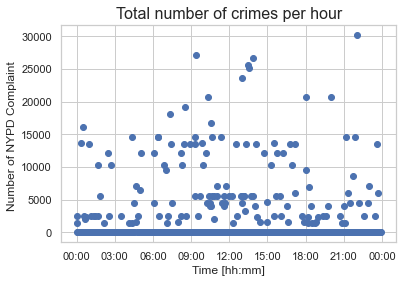

In [774]:
# The Time of crimes happend

import matplotlib.pyplot as plt
%matplotlib inline 

data=pd.read_csv('/Users/hindsalem/Desktop/Time.csv')
from matplotlib.dates import DateFormatter

data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM']).dt.time
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'].apply(str))


fig, ax = plt.subplots()
plt.title('Total number of crimes per hour',fontsize = '16')

ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.plot_date(data['CMPLNT_FR_TM'],data.Time_of_the_accidents, xdate=True)
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.ylabel('Number of NYPD Complaint ')
plt.xlabel('Time [hh:mm]')
# plt.plot()

Do the 100 busiest stations have complaints?

In [ ]:
arr

In [ ]:
# Arrange the stations where the crime took place and rank them from the 100 busiest stations

In [687]:
for i in arr:
    print(highest_traffic[(highest_traffic["STATION"]==i)])



          STATION  DAILY_ENTRIES
39  BOWLING GREEN     68457557.0
         STATION  DAILY_ENTRIES
43  BOROUGH HALL     66266570.0
         STATION  DAILY_ENTRIES
45  QUEENS PLAZA     64740358.0
      STATION  DAILY_ENTRIES
64  CITY HALL     53880268.0
           STATION  DAILY_ENTRIES
70  BRIGHTON BEACH     52818668.0
          STATION  DAILY_ENTRIES
39  BOWLING GREEN     68457557.0
         STATION  DAILY_ENTRIES
43  BOROUGH HALL     66266570.0
         STATION  DAILY_ENTRIES
45  QUEENS PLAZA     64740358.0
      STATION  DAILY_ENTRIES
64  CITY HALL     53880268.0
           STATION  DAILY_ENTRIES
70  BRIGHTON BEACH     52818668.0
          STATION  DAILY_ENTRIES
39  BOWLING GREEN     68457557.0
         STATION  DAILY_ENTRIES
43  BOROUGH HALL     66266570.0
         STATION  DAILY_ENTRIES
45  QUEENS PLAZA     64740358.0
      STATION  DAILY_ENTRIES
64  CITY HALL     53880268.0
           STATION  DAILY_ENTRIES
70  BRIGHTON BEACH     52818668.0
          STATION  DAILY_ENTRIES
39  BOW

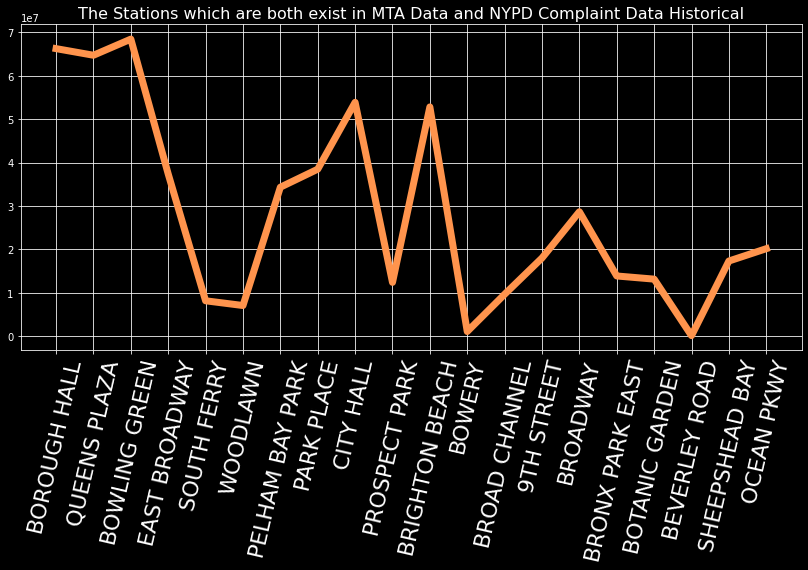

In [758]:

    


def style():

    plt.figure(figsize=[14,6])

    plt.plot(STATION,ENTRIES,linewidth = 7,c= '#ff944d')

    ticks_x=ENTRIES
    plt.title('The Stations which are both exist in MTA Data and NYPD Complaint Data Historical',fontsize = '16')

#     plt.xticks(STATION,fontsize=2)
    plt.xticks( STATION, fontsize = '22', family = 'bold',color='white',rotation=77);

    plt.grid()
with plt.style.context('dark_background'):
    style()

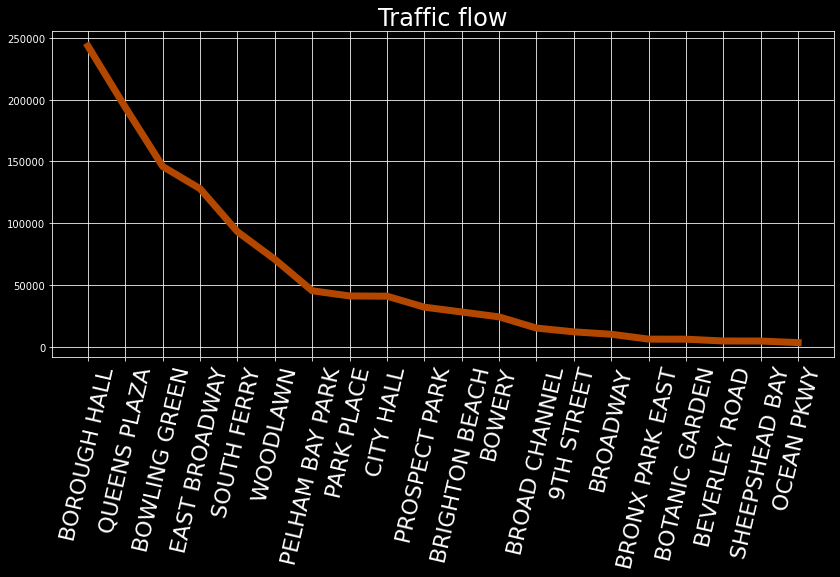

In [759]:
 def style():

    plt.figure(figsize=[14,6])


    plt.plot(STATION,accidents,linewidth = 7,c= '#b34700');
    ticks_x=ENTRIES
    plt.title('Traffic flow',fontsize = '24')

#     plt.xticks(STATION,fontsize=2)
    plt.xticks( STATION, fontsize = '22', family = 'bold',color='white',rotation=77);

    plt.grid()
with plt.style.context('dark_background'):
    style()   
    
    
    


Station with daily highest traffic. 

In [690]:
NYPD_Complaint_Data.columns

Index(['STATION', 'accidents'], dtype='object')

In [691]:
NYPD_Complaint_Data



,STATION,accidents
0,BOROUGH HALL,243468
1,QUEENS PLAZA,193856
2,BOWLING GREEN,145970
3,EAST BROADWAY,127949
4,SOUTH FERRY,93105
5,WOODLAWN,70700
6,PELHAM BAY PARK,45270
7,PARK PLACE,41058
8,CITY HALL,40878
9,PROSPECT PARK,31984


In [692]:
single_turnstile = turnstiles_daily[(turnstiles_daily["STATION"] == station)]


#  number of ENTRIES in unsafty station
# print(NYPD_Complaint_Data.STATION)
def data():
    dfs=[]
    for station in NYPD_Complaint_Data.STATION:
        all_turnstile = station_totals[(station_totals["STATION"] == station)]
        dfs.append(all_turnstile)
        pd.concat(dfs)
    return pd.concat(dfs)

station_inNYPD_daily=data()



In [693]:

df=pd.merge(station_inNYPD_daily,NYPD_Complaint_Data)


# df =df.fillna(dict.fromkeys(['DAILY_ENTRIES', 'accidents'], 0), inplace=True)

df

,STATION,DAILY_ENTRIES,accidents
0,BOROUGH HALL,66266570.0,243468
1,QUEENS PLAZA,64740358.0,193856
2,BOWLING GREEN,68457557.0,145970
3,EAST BROADWAY,37343441.0,127949
4,SOUTH FERRY,8118891.0,93105
5,WOODLAWN,7025938.0,70700
6,PELHAM BAY PARK,34309670.0,45270
7,PARK PLACE,38465990.0,41058
8,CITY HALL,53880268.0,40878
9,PROSPECT PARK,12361525.0,31984


In [694]:
df.corr()

,DAILY_ENTRIES,accidents
DAILY_ENTRIES,1.000000,0.692869
accidents,0.692869,1.000000


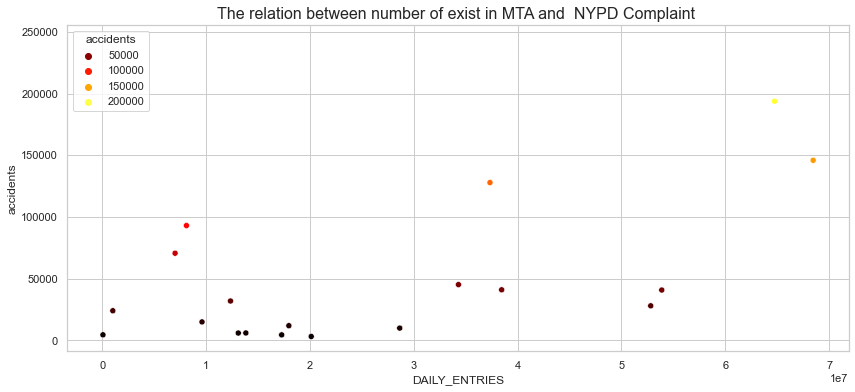

In [772]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=[14,6])
plt.title('The relation between number of exist in MTA and  NYPD Complaint ',fontsize = '16')

sns.scatterplot(x = "DAILY_ENTRIES", y = "accidents",data=df,hue='accidents',palette='hot')

plt.show()